In [1]:
import os
os.chdir('..')
os.getcwd()

import pandas as pd
import geopandas as gpd
import numpy as np

PROJ: proj_create_from_database: Cannot find proj.db


In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
# reading russian regions data (capitals coordinates)
rus_info_df = pd.read_csv("data/regions-info.csv")

# reading russian regions data (region bounds)
rus_bnd_gdf = gpd.read_file("data/geo.json")

In [8]:
# reading students data
students = pd.read_csv("../data/bip.csv")

E:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: DtypeWarning: Columns (57) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
# region names english cast dictionary 
cast_dict = {"Moscow" : "москва и мо",
            "Moscow region":"москва и мо",
            "Republic of Bashkortostan" : "уфа и рб",
            "St. Petersburg": "санкт-петербург и ло",
             "Leningrad region": "санкт-петербург и ло",
             "Chelyabinsk region": "челябинск и чо",
             "Krasnoyarsk region": "красноярск и кк",
             "Murmansk region": "мурманск и мо",
             "Sverdlovsk region": "екатеринбург и со",
             "Arkhangelsk region": "архангельск и ао",
             "Irkutsk region":"иркутск и ио",
             "Samara Region": "самара и со",
              "Perm":  "пермь и пк",
             "Republic of Tatarstan": "казань и рт",
             "Saratov region": "саратов и со",
             "Nizhny Novgorod Region": "нижний новгород и но",
             "Rostov region": "ростов-на-дону и ро",
             "The Republic of Karelia": "петрозаводск и рк",
             "Orenburg region": "оренбург и оо",
             "Novosibirsk region": "новосибирск и но",
             "Volgograd region": "волгоград и во",
             "Udmurt republic": "ижевск и ру",
             "Tomsk region" : "томск и то",
             "Voronezh region": "воронеж и во",
             "Omsk region": "омск и оо",
             "Krasnodar region": "краснодар и кк",
             "Komi Republic": "сыктывкар и рк",
             "Kemerovo region": "кемерово и ко",
             "Yaroslavl region":"ярославль и яо",
             "Kaliningrad region": "калининград и ко",
             "Ulyanovsk region": "ульяновск и уо",
             "Khabarovsk region": "хабаровск и хк",
             "Primorsky Krai": "владивосток и пк",
             "Chuvash Republic": "чебоксары и чр",
             "Pskov region": "псков и по",
             "Vologda Region":"вологда и во",
             "Tyumen region": "тюмень и то",
             "Oryol Region": "орел и оо",
             "Kirov region": "киров и ко",
             "The Republic of Mordovia": "саранск и рм",
             "Mari El Republic": "йошкар-ола и рмэ",
             "Astrakhan region": "астрахань и ао",
#              "Smolensk region": "смоленск и со",
             "Penza region": "пенза и по",
             "Zabaykalsky Krai": "чита и зк",
             "The Republic of Buryatia": "улан-удэ и рб",
             "Belgorod region": "белгород и бо",
             "Kurgan region": "курган и ко",
             "Ivanovo region": "иваново и ио",
             "The Republic of Sakha (Yakutia)":"якутск и рс",
             "Stavropol region": "ставрополь и ск",
             "Kostroma region": "кострома и ко",
             "Kamchatka Krai" : "петропавловск-камчатский и кк",
             "Kaluga region": "калуга и ко",
             "Yamalo-Nenets Autonomous Okrug": "салехард и янао",
             "The Republic of Khakassia": "абакан и рх",
             "Altai Republic" : "барнаул и ак",
             "Tambov Region": "тамбов и то",
             "Khanty-Mansiysk": "сургут и хмао",
             "The Republic of Dagestan": "махачкала и рд",
#              "Chechen Republic": "грозный и рч",
             "Vladimir region": "владимир и во",
             "Bryansk region": "брянск и бо"
            }

In [10]:
# creating united dataframes
rus_gdf = gpd.GeoDataFrame(rus_info_df, geometry=gpd.points_from_xy(rus_info_df.Longitude, rus_info_df.Latitude))
rus_gdf.crs = {'init': 'epsg:4326'}

rus_shape = rus_bnd_gdf[['NAME_1', 'TYPE_1', 'ID_1', 'geometry']]

rus_gdf_polygons = gpd.sjoin(rus_gdf, rus_shape, how="right", op='within')
rus_gdf_polygons = rus_gdf_polygons[rus_gdf_polygons["Region_eng"] != "Russia"]
rus_gdf_polygons = rus_gdf_polygons[~rus_gdf_polygons.Region_eng.isin(["Republic of Crimea", "Sevastopol"])]

rus_gdf_dots = gpd.sjoin(rus_gdf, rus_shape, how="left", op='within')

E:\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
# casting region names
rus_gdf_polygons["merge_col"] = rus_gdf_polygons.Region_eng.apply(lambda x: cast_dict[x] if x in cast_dict else "другой город (РФ)")

In [13]:
# selecting state exams
math_df = students[["MACRO_BIRTH_PLACE", "MATH", "INFORMATICS"]].groupby("MACRO_BIRTH_PLACE").mean().reset_index()
rus_gdf_polygons = rus_gdf_polygons.merge(math_df, left_on="merge_col", right_on="MACRO_BIRTH_PLACE", how="left")

In [60]:
# plot utils
dots_cast = {
 "Mosow": "Moscow",
 "St. Petersburg": "St. Petersburg",
 "Republic of Tatarstan": "Kazan'",
 "Sverdlovsk region": "Yekaterinburg", 
# "Novosibirsk region" : "Novosibirsk", 
 "Kaliningrad region": "Kaliningrad",
}
colors = ["red", "snow", "orange", "orangered", "yellow", "maroon"]
rus_gdf_dots["Region_eng"] = rus_gdf_dots["Region_eng"].apply(lambda x: dots_cast[x] if x in dots_cast else x)

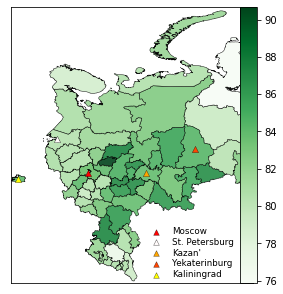

In [93]:
# plotting math map
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="4%", pad=-1.4)
rus_gdf_polygons.plot(column="MATH", ax=axs, cmap='Greens', edgecolor='black', alpha=0.9, linewidth=0.5, 
             legend=True, cax=cax)
for i, city in enumerate(list(dots_cast.values())):
    rus_gdf_dots[rus_gdf_dots["Region_eng"] == city].plot( color=colors[i], ax=axs, marker="^",
          markersize=40, edgecolor='black', linewidth=0.3)
axs.set_xlim(19.5, 75)
axs.set_ylim(41, 77.5)
axs.set_xticks([])
axs.set_yticks([])

for i, city in enumerate(list(dots_cast.values())):
    axs.scatter([0], [0], c=colors[i], s=32, marker="^",
            label=city, edgecolor='black', linewidth=0.3)


axs.legend(scatterpoints=1, frameon=False,
        labelspacing=0.2, loc=(0.55, 0), fontsize=45, title_fontsize=20, prop={"size":8.8});
fig.savefig("../gfx/map_math.pdf", bbox_inches='tight')
plt.show()

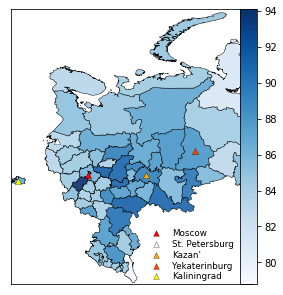

In [94]:
# plotting informatics map
fig, axs = plt.subplots(1, 1, figsize=(6, 6))
divider = make_axes_locatable(axs)
cax = divider.append_axes("right", size="4%", pad=-1.4)
rus_gdf_polygons.plot(column="INFORMATICS", ax=axs, cmap='Blues', edgecolor='black', alpha=0.9, linewidth=0.5, 
             legend=True, cax=cax)
for i, city in enumerate(list(dots_cast.values())):
    rus_gdf_dots[rus_gdf_dots["Region_eng"] == city].plot( color=colors[i], ax=axs, marker="^",
          markersize=40, edgecolor='black', linewidth=0.3)
axs.set_xlim(19.5, 75)
axs.set_ylim(41, 77.5)
axs.set_xticks([])
axs.set_yticks([])

for i, city in enumerate(list(dots_cast.values())):
    axs.scatter([0], [0], c=colors[i], s=32, marker="^",
            label=city, edgecolor='black', linewidth=0.3)


axs.legend(scatterpoints=1, frameon=False,
        labelspacing=0.2, loc=(0.55, 0), fontsize=45, title_fontsize=20, prop={"size":8.8});
fig.savefig("../gfx/map_informatics.pdf", bbox_inches='tight')

plt.show()

In [22]:
# creating per-year mean state exam df
plot_df = students[students["START_YEAR"] > "2015-09-01"][["START_YEAR", "MATH", "INFORMATICS"]].groupby("START_YEAR").mean().reset_index()
plot_df.START_YEAR = plot_df.START_YEAR.apply(lambda x: x.split('-')[0])

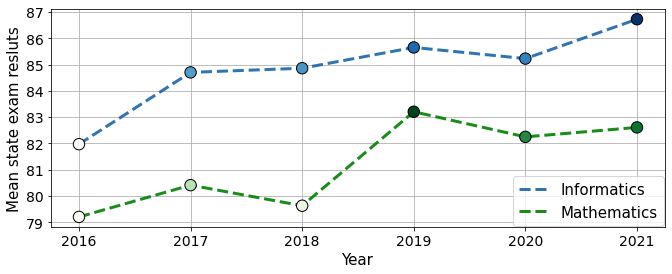

In [112]:
# trend plotting
fig = plt.figure(figsize=(11, 4))


plt.plot(plot_df.START_YEAR, plot_df.INFORMATICS, c="#1c64a9", zorder=10, linewidth=3, alpha=0.9,
         linestyle='--', label="Informatics")
plt.scatter(plot_df.START_YEAR, plot_df.INFORMATICS, c=plot_df.INFORMATICS, s=130,  
            edgecolor='black', 
            linewidth=1, cmap="Blues", zorder=100)


plt.plot(plot_df.START_YEAR, plot_df.MATH, c="Green", zorder=10, linewidth=3, alpha=0.9, linestyle='--', label="Mathematics")
plt.scatter(plot_df.START_YEAR, plot_df.MATH, c=plot_df.MATH,  cmap="Greens", 
            s=130,  
            edgecolor='black', 
            linewidth=1, zorder=100)


plt.legend(fontsize=15, loc=(0.752, 0.005))
plt.ylabel("Mean state exam resluts", fontsize=15)
plt.xlabel("Year", fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
fig.savefig("../gfx/ege_trend.pdf", bbox_inches='tight')

plt.show()